#📌 Extracão

In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [411]:
# Cargar os dados diretamente desde a fonte
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [412]:
# Primeiras linhas do conjunto de dados
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [413]:
# Normalizar o dataframe
df_normalizado = pd.json_normalize(df.to_dict(orient='records'), sep='_')

# Os 5 primeiros e últimos registros normalizados
df_normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [414]:
# Informações gerais das colunas e tipos de dados
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [415]:
# Estatísticas descritivas básicas
df_normalizado.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


#🔧 Transformação

In [416]:
# Verifica valores nulos em cada coluna.
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [417]:
# Identifica registros duplicados.
df_normalizado.duplicated().sum()

np.int64(0)

In [418]:
# Remove registros duplicados.
df_normalizado.drop_duplicates()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [419]:
# Criar a coluna 'Contas_Diarias' dividindo 'account_Charges_Monthly' por 30
df_normalizado['Contas_Diarias'] = round(df_normalizado['account_Charges_Monthly'] / 30,5)

In [420]:
# Estatísticas descritivas básicas da coluna 'Contas_Diarias'
df_normalizado['Contas_Diarias'].describe()

,Contas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608330
25%,1.180835
50%,2.343330
75%,2.995835
max,3.958330


In [421]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [422]:
# Salvar o dataframe normalizado em um arquivo.csv
df_normalizado.to_csv('TelecomX_Data_normalizado.csv', index=False)

#📊 Carga e análise

In [423]:
# Análise descritiva das variáveis numéricas
print("Análise Descritiva das Variáveis Numéricas:\n")
print(df_normalizado.describe())

# Análise descritiva das variáveis categóricas (frequência e contagem)
print("\nAnálise Descritiva das Variáveis Categóricas:\n")
for col in df_normalizado.select_dtypes(include='object').columns[1:]:
    print(f"\nColuna: {col}")
    print(df_normalizado[col].value_counts())
    print("-" * 30,5)

Análise Descritiva das Variáveis Numéricas:

       customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       Contas_Diarias  
count     7267.000000  
mean         2.157337  
std          1.004319  
min          0.608330  
25%          1.180835  
50%          2.343330  
75%          2.995835  
max          3.958330  

Análise Descritiva das Variáveis Categóricas:


Coluna: Churn


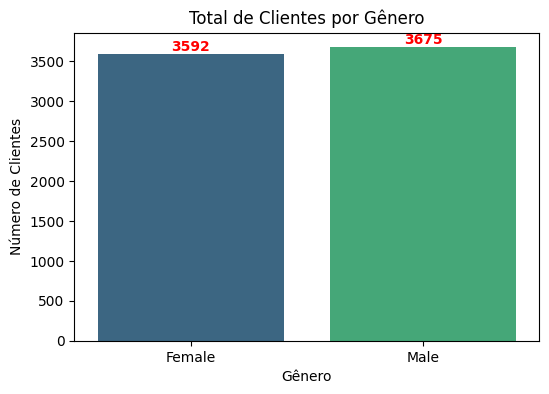


Análise do Gráfico: Evasão de Clientes por Gênero
  - A taxa de Churn parece ser bastante similar entre homens e mulheres.
  - O gênero não parece ser um fator determinante para a evasão de clientes.


In [424]:
plt.figure(figsize=(6, 4))
# Gráfico de barras
ax = sns.countplot(x ='customer_gender', data = df_normalizado, palette = 'viridis', hue = 'customer_gender', legend = 'auto')
# Contagem por gênero
counts = df_normalizado['customer_gender'].value_counts()
# Adicionar rótulos no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='red')

plt.title('Total de Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Gênero'
print("\nAnálise do Gráfico: Evasão de Clientes por Gênero")
print("  - A taxa de Churn parece ser bastante similar entre homens e mulheres.")
print("  - O gênero não parece ser um fator determinante para a evasão de clientes.")

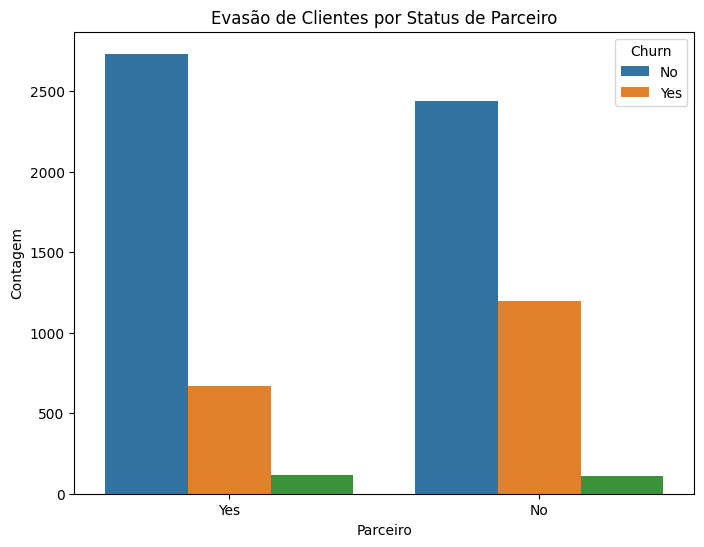


Análise do Gráfico: Evasão de Clientes por Status de Parceiro
  - Clientes que não possuem parceiros (No) tendem a ter uma taxa de Churn maior do que clientes que possuem parceiros (Yes).
  - Ter um parceiro pode ser um indicador de menor propensão a cancelar o serviço.


In [425]:
# Análise de evasão de clientes por status de parceiro
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_Partner', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Status de Parceiro')
plt.xlabel('Parceiro')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Status de Parceiro'
print("\nAnálise do Gráfico: Evasão de Clientes por Status de Parceiro")
print("  - Clientes que não possuem parceiros (No) tendem a ter uma taxa de Churn maior do que clientes que possuem parceiros (Yes).")
print("  - Ter um parceiro pode ser um indicador de menor propensão a cancelar o serviço.")

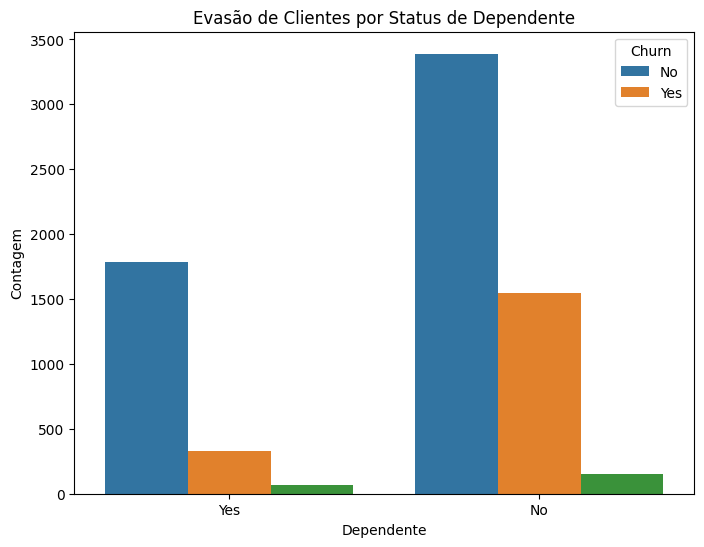


Análise do Gráfico: Evasão de Clientes por Status de Dependente
  - Clientes que não possuem dependentes (No) tendem a apresentar uma taxa de Churn mais alta do que clientes com dependentes (Yes).
  - Clientes com dependentes podem ter maior necessidade de serviços de comunicação e, portanto, menor probabilidade de cancelar.


In [426]:
# Análise de evasão de clientes por status de dependente
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_Dependents', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Status de Dependente')
plt.xlabel('Dependente')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Status de Dependente'
print("\nAnálise do Gráfico: Evasão de Clientes por Status de Dependente")
print("  - Clientes que não possuem dependentes (No) tendem a apresentar uma taxa de Churn mais alta do que clientes com dependentes (Yes).")
print("  - Clientes com dependentes podem ter maior necessidade de serviços de comunicação e, portanto, menor probabilidade de cancelar.")

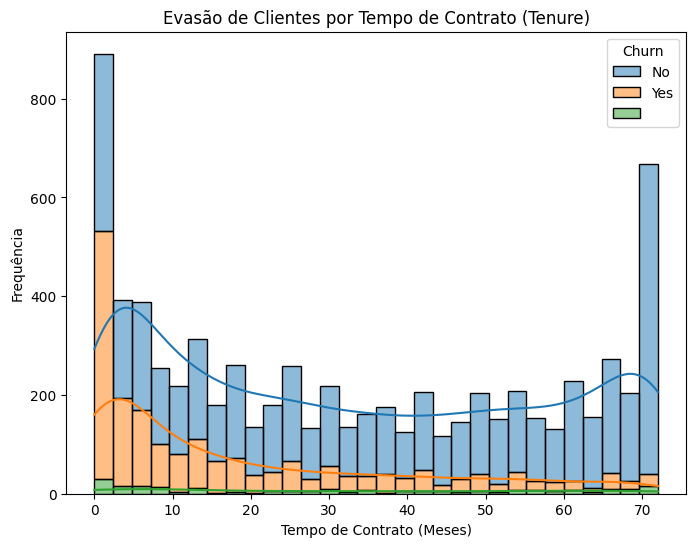


Análise do Gráfico: Evasão de Clientes por Tempo de Contrato (Tenure)
  - O gráfico de histograma empilhado mostra que a maior parte do Churn ocorre entre clientes com menor tempo de contrato (tenure).
  - A proporção de clientes com Churn diminui significativamente à medida que o tempo de contrato aumenta.
  - Isso reforça a importância de engajar e reter clientes nos primeiros meses.


In [427]:
# Análise de evasão de clientes por tempo de contrato (tenure)
plt.figure(figsize=(8, 6))
sns.histplot(data=df_normalizado, x='customer_tenure', hue='Churn', multiple='stack', kde=True, bins=30)
plt.title('Evasão de Clientes por Tempo de Contrato (Tenure)')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Frequência')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Tempo de Contrato (Tenure)'
print("\nAnálise do Gráfico: Evasão de Clientes por Tempo de Contrato (Tenure)")
print("  - O gráfico de histograma empilhado mostra que a maior parte do Churn ocorre entre clientes com menor tempo de contrato (tenure).")
print("  - A proporção de clientes com Churn diminui significativamente à medida que o tempo de contrato aumenta.")
print("  - Isso reforça a importância de engajar e reter clientes nos primeiros meses.")


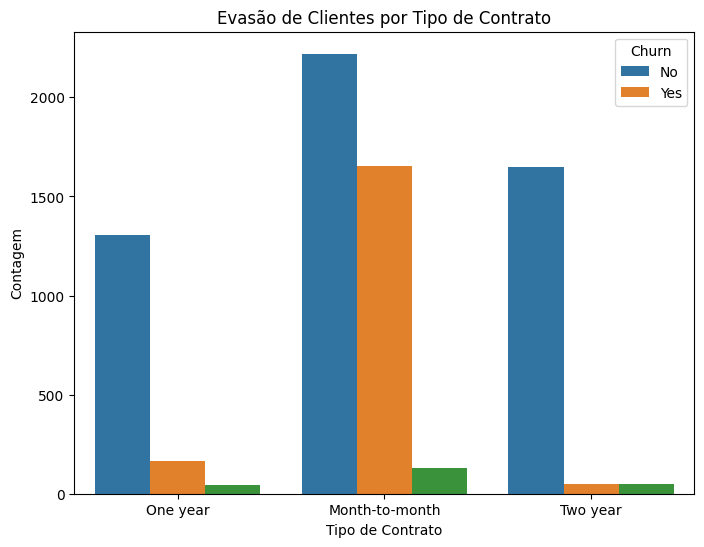


Análise do Gráfico: Evasão de Clientes por Tipo de Contrato
  - Clientes com contratos mensais (Month-to-month) têm uma taxa de Churn muito maior em comparação com clientes com contratos de um ou dois anos.
  - Contratos de longo prazo (One year e Two year) estão associados a uma menor taxa de Churn.
  - Oferecer incentivos para contratos mais longos pode ser uma estratégia de retenção eficaz.


In [428]:
# Análise de evasão de clientes por tipo de contrato
plt.figure(figsize=(8, 6))
sns.countplot(x='account_Contract', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Tipo de Contrato'
print("\nAnálise do Gráfico: Evasão de Clientes por Tipo de Contrato")
print("  - Clientes com contratos mensais (Month-to-month) têm uma taxa de Churn muito maior em comparação com clientes com contratos de um ou dois anos.")
print("  - Contratos de longo prazo (One year e Two year) estão associados a uma menor taxa de Churn.")
print("  - Oferecer incentivos para contratos mais longos pode ser uma estratégia de retenção eficaz.")


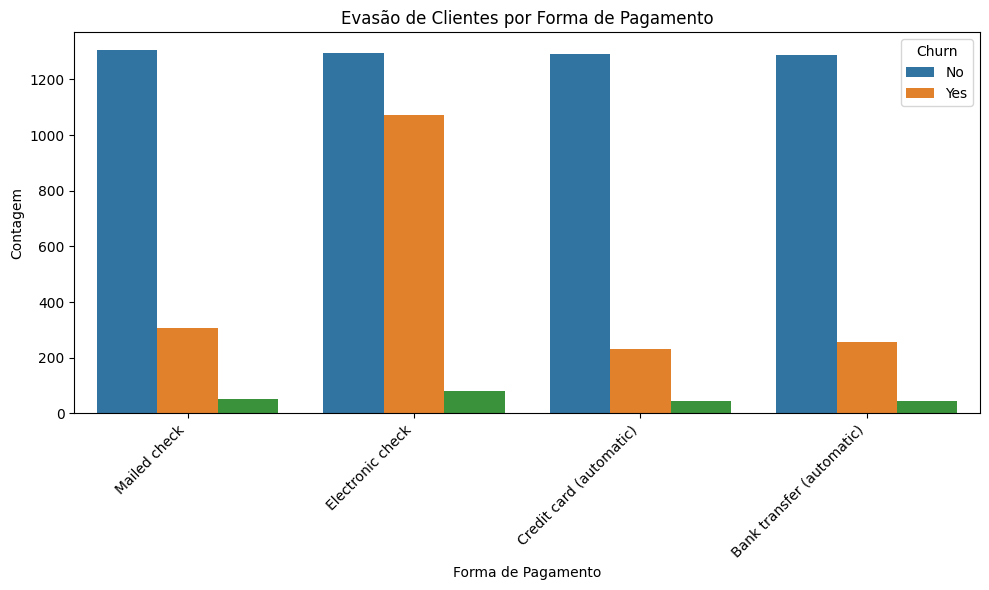


Análise do Gráfico: Evasão de Clientes por Forma de Pagamento
  - A forma de pagamento 'Electronic check' apresenta a maior taxa de Churn em comparação com as outras formas de pagamento.
  - Métodos de pagamento como 'Mailed check', 'Bank transfer (automatic)' e 'Credit card (automatic)' têm taxas de Churn menores.
  - Pode haver problemas ou atritos associados ao pagamento via 'Electronic check'.


In [429]:
# Análise de evasão de clientes por forma de pagamento
plt.figure(figsize=(10, 6))
sns.countplot(x='account_PaymentMethod', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Forma de Pagamento'
print("\nAnálise do Gráfico: Evasão de Clientes por Forma de Pagamento")
print("  - A forma de pagamento 'Electronic check' apresenta a maior taxa de Churn em comparação com as outras formas de pagamento.")
print("  - Métodos de pagamento como 'Mailed check', 'Bank transfer (automatic)' e 'Credit card (automatic)' têm taxas de Churn menores.")
print("  - Pode haver problemas ou atritos associados ao pagamento via 'Electronic check'.")

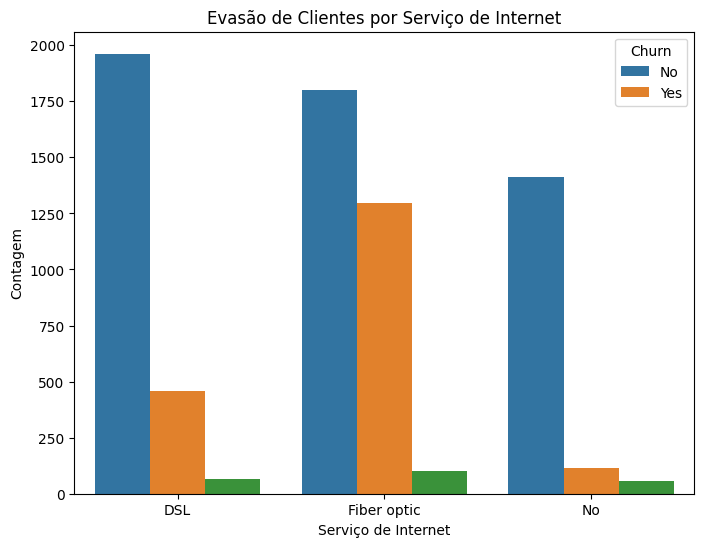


Análise do Gráfico: Evasão de Clientes por Serviço de Internet
  - Clientes com serviço de internet 'Fiber optic' têm uma taxa de Churn significativamente mais alta do que aqueles com 'DSL' ou sem serviço de internet.
  - Isso pode indicar problemas de qualidade, preço ou concorrência associados ao serviço de fibra óptica.


In [430]:
# Análise de evasão de clientes por serviço de internet
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_InternetService', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Serviço de Internet'
print("\nAnálise do Gráfico: Evasão de Clientes por Serviço de Internet")
print("  - Clientes com serviço de internet 'Fiber optic' têm uma taxa de Churn significativamente mais alta do que aqueles com 'DSL' ou sem serviço de internet.")
print("  - Isso pode indicar problemas de qualidade, preço ou concorrência associados ao serviço de fibra óptica.")

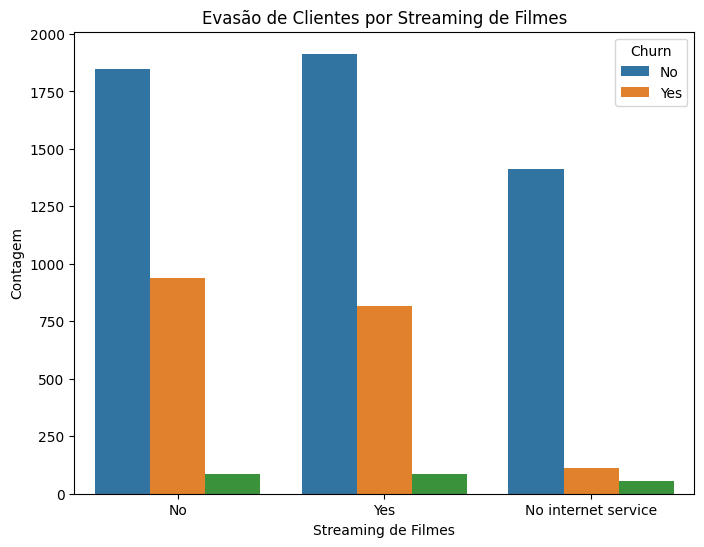


Análise do Gráfico: Evasão de Clientes por Streaming de Filmes
  - Clientes que utilizam Streaming de Filmes (Yes) parecem ter uma taxa de Churn ligeiramente menor do que aqueles que não utilizam (No).
  - Clientes sem serviço de internet também apresentam uma baixa taxa de Churn neste contexto (pela ausência do serviço).


In [431]:
# Análise de evasão de clientes por streaming de filmes
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_StreamingMovies', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Streaming de Filmes')
plt.xlabel('Streaming de Filmes')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Streaming de Filmes'
print("\nAnálise do Gráfico: Evasão de Clientes por Streaming de Filmes")
print("  - Clientes que utilizam Streaming de Filmes (Yes) parecem ter uma taxa de Churn ligeiramente menor do que aqueles que não utilizam (No).")
print("  - Clientes sem serviço de internet também apresentam uma baixa taxa de Churn neste contexto (pela ausência do serviço).")

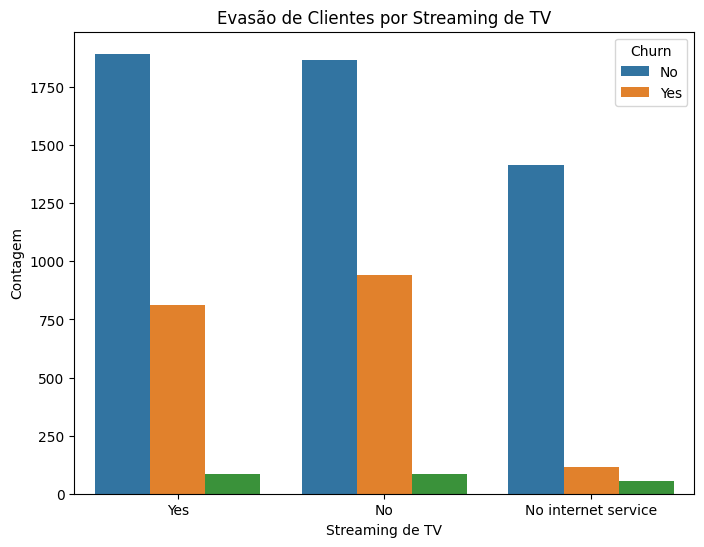


Análise do Gráfico: Evasão de Clientes por Streaming de TV
  - Similar ao streaming de filmes, clientes que utilizam Streaming de TV (Yes) parecem ter uma taxa de Churn um pouco menor do que aqueles que não utilizam (No).
  - Clientes sem serviço de internet também apresentam uma baixa taxa de Churn aqui.


In [432]:
# Análise de evasão de clientes por streaming de TV
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_StreamingTV', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Streaming de TV')
plt.xlabel('Streaming de TV')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Streaming de TV'
print("\nAnálise do Gráfico: Evasão de Clientes por Streaming de TV")
print("  - Similar ao streaming de filmes, clientes que utilizam Streaming de TV (Yes) parecem ter uma taxa de Churn um pouco menor do que aqueles que não utilizam (No).")
print("  - Clientes sem serviço de internet também apresentam uma baixa taxa de Churn aqui.")

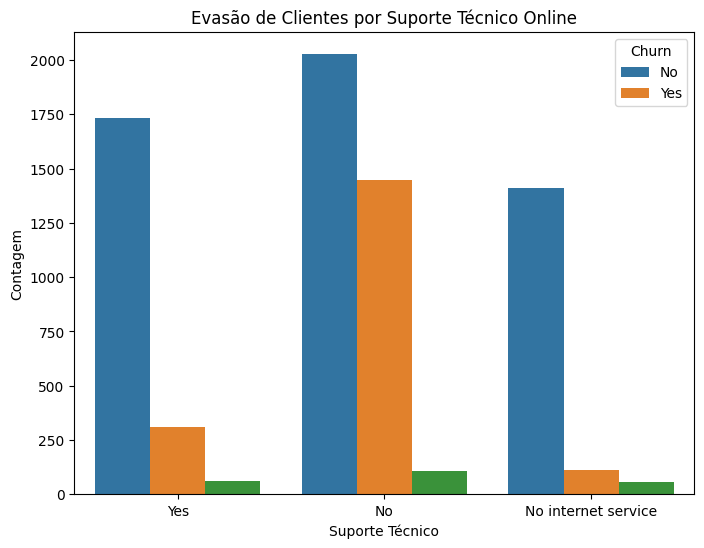


Análise do Gráfico: Evasão de Clientes por Suporte Técnico Online
  - Clientes que não possuem Suporte Técnico Online (No) apresentam uma taxa de Churn consideravelmente maior do que aqueles que possuem (Yes).
  - A falta de suporte técnico online é um forte indicador de propensão ao Churn.


In [433]:
# Análise de evasão de clientes por suporte técnico online
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_TechSupport', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Suporte Técnico Online')
plt.xlabel('Suporte Técnico')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Suporte Técnico Online'
print("\nAnálise do Gráfico: Evasão de Clientes por Suporte Técnico Online")
print("  - Clientes que não possuem Suporte Técnico Online (No) apresentam uma taxa de Churn consideravelmente maior do que aqueles que possuem (Yes).")
print("  - A falta de suporte técnico online é um forte indicador de propensão ao Churn.")

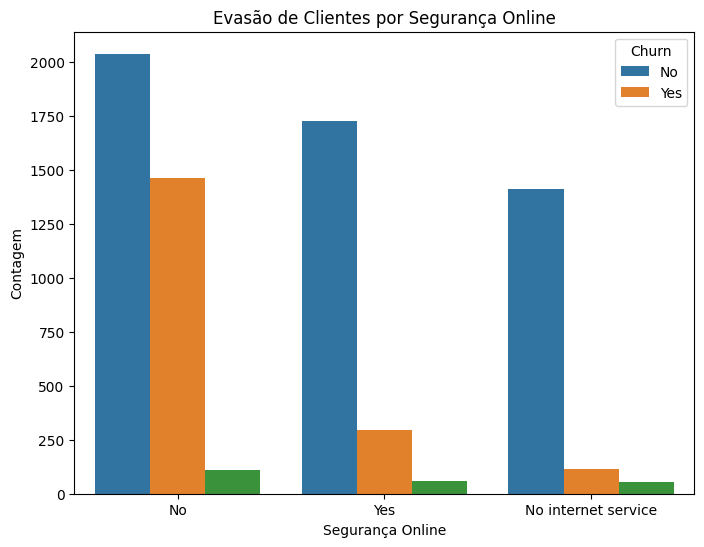


Análise do Gráfico: Evasão de Clientes por Segurança Online
  - Clientes sem Segurança Online (No) têm uma taxa de Churn muito mais alta do que aqueles com o serviço (Yes).
  - A segurança online parece ser um serviço importante para a retenção de clientes.


In [434]:
# Análise de evasão de clientes por segurança online
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_OnlineSecurity', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Segurança Online')
plt.xlabel('Segurança Online')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Segurança Online'
print("\nAnálise do Gráfico: Evasão de Clientes por Segurança Online")
print("  - Clientes sem Segurança Online (No) têm uma taxa de Churn muito mais alta do que aqueles com o serviço (Yes).")
print("  - A segurança online parece ser um serviço importante para a retenção de clientes.")

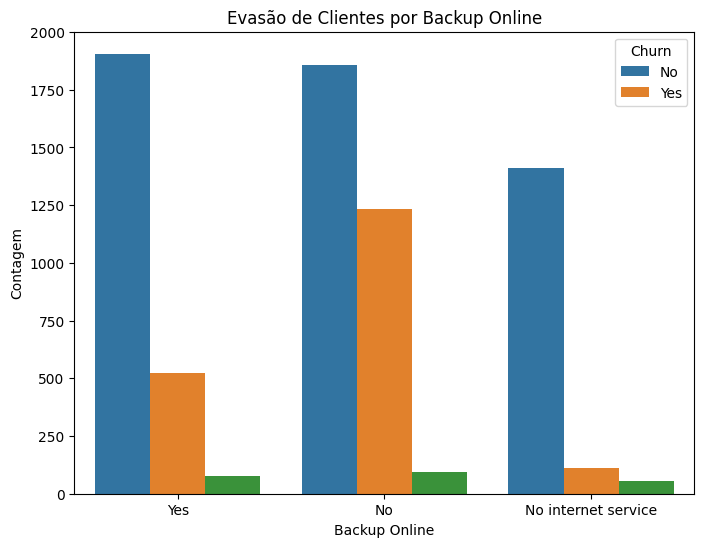


Análise do Gráfico: Evasão de Clientes por Backup Online
  - Clientes sem Backup Online (No) apresentam uma taxa de Churn maior do que aqueles com o serviço (Yes).
  - O backup online também contribui para a retenção de clientes.


In [435]:
# Análise de evasão de clientes por backup online
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_OnlineBackup', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Backup Online')
plt.xlabel('Backup Online')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Backup Online'
print("\nAnálise do Gráfico: Evasão de Clientes por Backup Online")
print("  - Clientes sem Backup Online (No) apresentam uma taxa de Churn maior do que aqueles com o serviço (Yes).")
print("  - O backup online também contribui para a retenção de clientes.")

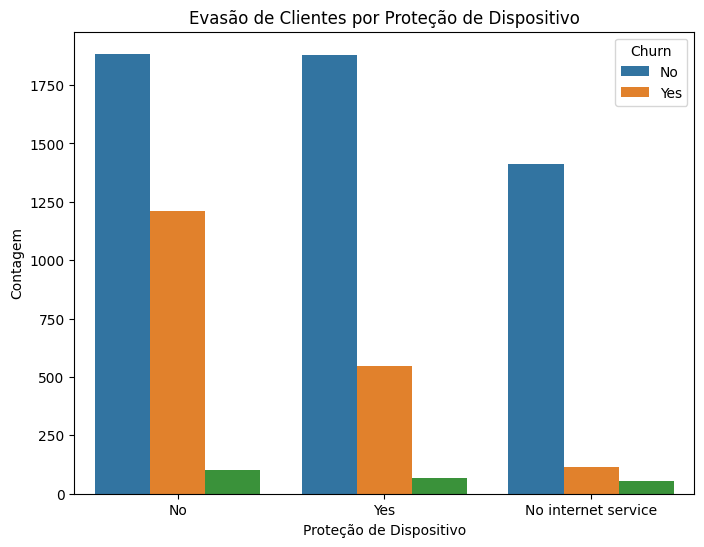


Análise do Gráfico: Evasão de Clientes por Proteção de Dispositivo
  - Clientes sem Proteção de Dispositivo (No) têm uma taxa de Churn maior do que aqueles com o serviço (Yes).
  - A proteção de dispositivo é outro fator que parece estar associado a menor Churn.


In [436]:
# Análise de evasão de clientes por proteção de dispositivo
plt.figure(figsize=(8, 6))
sns.countplot(x='internet_DeviceProtection', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Proteção de Dispositivo')
plt.xlabel('Proteção de Dispositivo')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Proteção de Dispositivo'
print("\nAnálise do Gráfico: Evasão de Clientes por Proteção de Dispositivo")
print("  - Clientes sem Proteção de Dispositivo (No) têm uma taxa de Churn maior do que aqueles com o serviço (Yes).")
print("  - A proteção de dispositivo é outro fator que parece estar associado a menor Churn.")

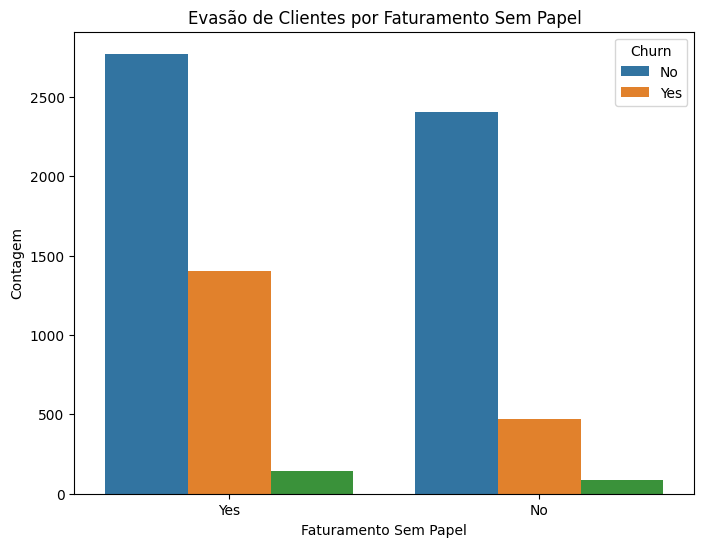


Análise do Gráfico> Evasão de Clientes por Faturamento Sem Papel
  - Clientes que optam pelo Faturamento Sem Papel (Yes) apresentam uma taxa de Churn significativamente maior do que aqueles que não optam (No).
  - Isso é um achado interessante e contraintuitivo; pode haver outros fatores associados a clientes que escolhem esta opção, ou talvez a experiência com o faturamento sem papel não seja ideal.


In [437]:
# Análise de evasão de clientes por faturamento sem papel
plt.figure(figsize=(8, 6))
sns.countplot(x='account_PaperlessBilling', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Faturamento Sem Papel')
plt.xlabel('Faturamento Sem Papel')
plt.ylabel('Contagem')
plt.show()


# Análise do Gráfico 'Evasão de Clientes por Faturamento Sem Papel'
print("\nAnálise do Gráfico> Evasão de Clientes por Faturamento Sem Papel")
print("  - Clientes que optam pelo Faturamento Sem Papel (Yes) apresentam uma taxa de Churn significativamente maior do que aqueles que não optam (No).")
print("  - Isso é um achado interessante e contraintuitivo; pode haver outros fatores associados a clientes que escolhem esta opção, ou talvez a experiência com o faturamento sem papel não seja ideal.")

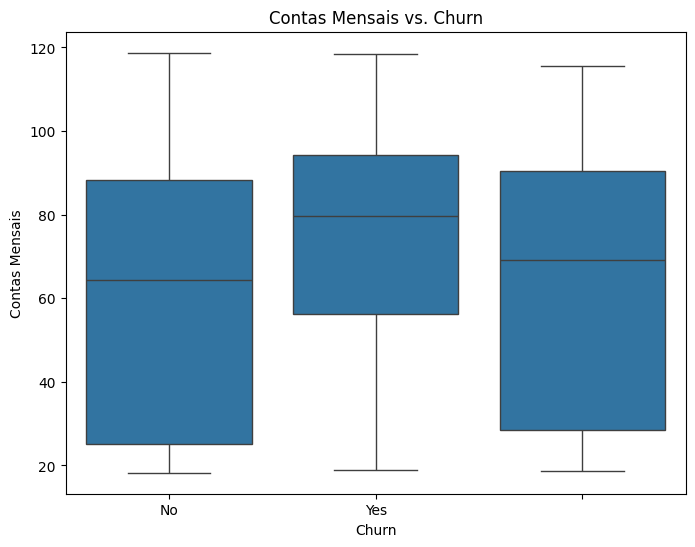


Análise do Gráfico: Contas Mensais vs. Churn
  - O boxplot mostra que clientes que cancelaram (Yes) tendem a ter Contas Mensais (Monthly Charges) mais altas em comparação com clientes que não cancelaram (No).
  - Clientes com custos mensais mais elevados são mais propensos a sair.


In [438]:
# Análise de evasão de clientes por contas mensais vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_normalizado)
plt.title('Contas Mensais vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Contas Mensais')
plt.show()

# Análise do Gráfico 'Contas Mensais vs. Churn'
print("\nAnálise do Gráfico: Contas Mensais vs. Churn")
print("  - O boxplot mostra que clientes que cancelaram (Yes) tendem a ter Contas Mensais (Monthly Charges) mais altas em comparação com clientes que não cancelaram (No).")
print("  - Clientes com custos mensais mais elevados são mais propensos a sair.")

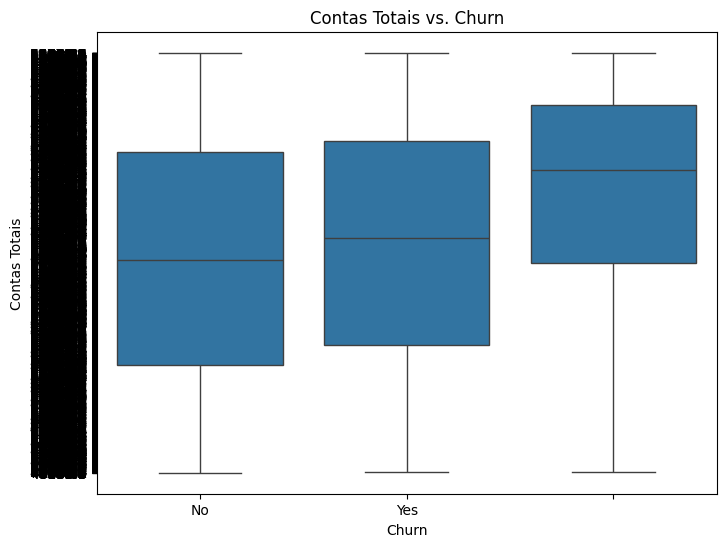


 Análise do Gráfico: Contas Totais vs. Churn
  - O boxplot indica que clientes que cancelaram (Yes) geralmente têm Contas Totais (Total Charges) mais baixas do que clientes que não cancelaram (No).
  - Isso faz sentido, pois clientes com Churn tendem a ter menor tempo de contrato (tenure), resultando em contas totais menores.


In [440]:
# Análise de evasão de clientes por contas totais vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Total', data=df_normalizado)
plt.title('Contas Totais vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Contas Totais')
plt.show()

# Análise do Gráfico 'Contas Totais vs. Churn'
print("\n Análise do Gráfico: Contas Totais vs. Churn")
print("  - O boxplot indica que clientes que cancelaram (Yes) geralmente têm Contas Totais (Total Charges) mais baixas do que clientes que não cancelaram (No).")
print("  - Isso faz sentido, pois clientes com Churn tendem a ter menor tempo de contrato (tenure), resultando em contas totais menores.")

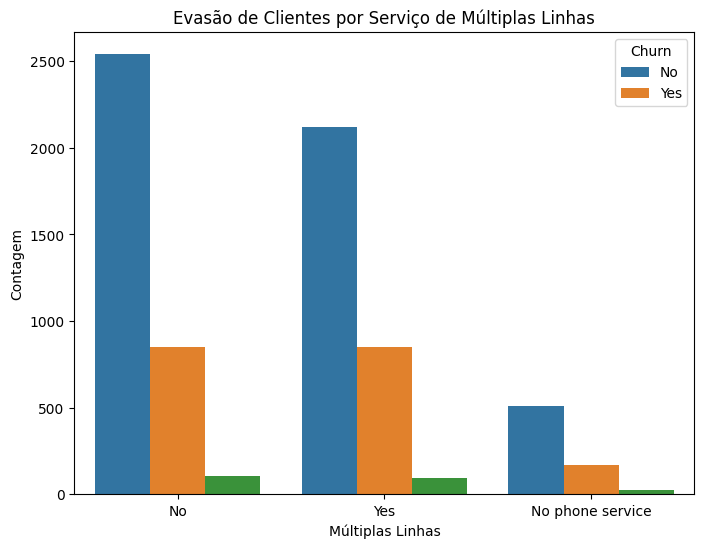


 Análise do Gráfico: Evasão de Clientes por Serviço de Múltiplas Linhas
  - Clientes com Múltiplas Linhas (Yes) apresentam uma taxa de Churn ligeiramente maior do que aqueles sem Múltiplas Linhas (No).
  - Clientes sem serviço de telefone também apresentam baixa taxa de Churn aqui.


In [441]:
# Análise de evasão de clientes por serviço de múltiplas linhas
plt.figure(figsize=(8, 6))
sns.countplot(x='phone_MultipleLines', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Serviço de Múltiplas Linhas')
plt.xlabel('Múltiplas Linhas')
plt.ylabel('Contagem')
plt.show()

# Análise do Gráfico 'Evasão de Clientes por Serviço de Múltiplas Linhas'
print("\n Análise do Gráfico: Evasão de Clientes por Serviço de Múltiplas Linhas")
print("  - Clientes com Múltiplas Linhas (Yes) apresentam uma taxa de Churn ligeiramente maior do que aqueles sem Múltiplas Linhas (No).")
print("  - Clientes sem serviço de telefone também apresentam baixa taxa de Churn aqui.")



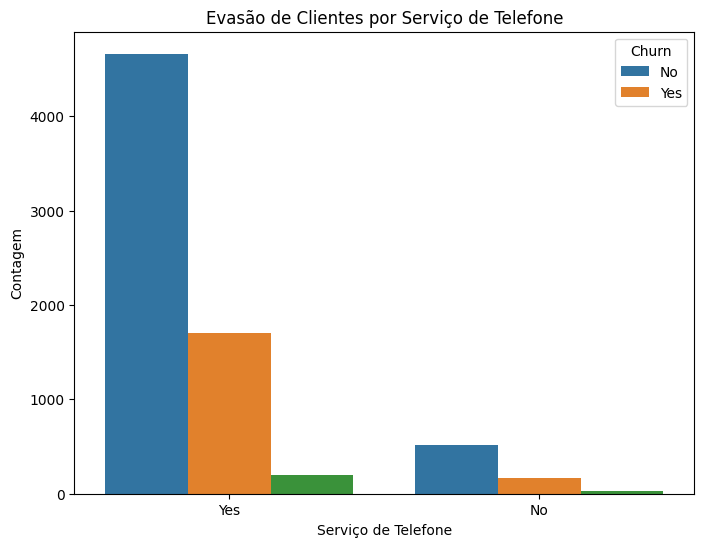


 Análise do Gráfico: Evasão de Clientes por Serviço de Telefone
  - Clientes que possuem Serviço de Telefone (Yes) têm uma taxa de Churn um pouco mais alta do que aqueles que não possuem (No).
  - A ausência de serviço de telefone está associada a menor Churn.


In [442]:
# Análise de evasão de clientes por tipo de linha telefônica
plt.figure(figsize=(8, 6))
sns.countplot(x='phone_PhoneService', hue='Churn', data=df_normalizado)
plt.title('Evasão de Clientes por Serviço de Telefone')
plt.xlabel('Serviço de Telefone')
plt.ylabel('Contagem')
plt.show()
# Análise do Gráfico 'Evasão de Clientes por Serviço de Telefone'
print("\n Análise do Gráfico: Evasão de Clientes por Serviço de Telefone")
print("  - Clientes que possuem Serviço de Telefone (Yes) têm uma taxa de Churn um pouco mais alta do que aqueles que não possuem (No).")
print("  - A ausência de serviço de telefone está associada a menor Churn.")


#📄Relatorio Final

Resumo das Principais Conclusões para Análise de Churn
- A taxa de Churn é significativa e merece atenção.
- Clientes com menor tempo de contrato (tenure) e aqueles com contratos mensais são os mais propensos a cancelar.
- Serviços como Suporte Técnico Online, Segurança Online, Backup Online e Proteção de Dispositivo estão associados a menor Churn.
- O serviço de internet Fibra Óptica e a forma de pagamento 'Electronic check' parecem estar associados a maior Churn.
- Clientes com contas mensais mais altas são mais propensos a cancelar.
- Status de Parceiro e Dependente também influenciam na propensão ao Churn.
- Gênero e serviço de telefone (de forma isolada) não parecem ser fortes preditores de Churn.
- A opção por faturamento sem papel (Paperless Billing) mostrou uma associação inesperada com maior Churn.

A análise exploratória do conjunto de dados TelecomX revelou insights importantes sobre a evasão de clientes `('Churn')`.

Observamos que a variável Churn possui uma distribuição desbalanceada, com um número maior de clientes que não evadiram em comparação àqueles que evadiram. Isso indica que a maioria dos clientes permaneceu com a empresa durante o período analisado.

Ao segmentar a evasão por gênero, não identificamos uma diferença significativa na proporção de clientes que evadiram entre homens e mulheres. A taxa de evasão parece ser semelhante para ambos os grupos.

Embora tenhamos analisado a relação entre gênero e serviço de telefone, e a distribuição das contas diárias por gênero, estas variáveis não apresentaram padrões claros que explicassem a evasão. Seria interessante investigar outros fatores, como o tempo de contrato `(tenure)`, o tipo de serviço `(internet, streaming, etc.)` e as opções de pagamento, para obter uma compreensão mais completa dos motivadores da evasão.

Em suma, a evasão de clientes na TelecomX é um fenômeno complexo influenciado por uma combinação de fatores relacionados ao tempo de contrato, tipo de serviço, método de pagamento e utilização de serviços adicionais. A compreensão desses fatores é crucial para o desenvolvimento de estratégias de retenção direcionadas e eficazes
